In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
from sklearn.model_selection import train_test_split
import sklearn.neighbors as skl_nb
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')
df1= pd.read_csv('test.csv')

In [3]:
#df.replace({'Lead': {"Female" : 1, "Male" : 0}}, inplace=True)

In [4]:
df.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead,Lead
0,1512,6394,2251.0,343,2,1995,5,2631,142.0,51.500000,42.333333,46.0,65.0,Female
1,1524,8780,2020.0,1219,9,2001,4,5236,37.0,39.125000,29.333333,58.0,34.0,Male
2,155,4176,942.0,787,7,1968,1,3079,376.0,42.500000,37.000000,46.0,37.0,Male
3,1073,9855,3440.0,2623,12,2002,2,5342,19.0,35.222222,21.500000,33.0,23.0,Male
4,1317,7688,3835.0,3149,8,1988,4,2536,40.0,45.250000,45.000000,36.0,39.0,Male


In [5]:
df1.head()

,Number words female,Total words,Number of words lead,Difference in words lead and co-lead,Number of male actors,Year,Number of female actors,Number words male,Gross,Mean Age Male,Mean Age Female,Age Lead,Age Co-Lead
0,669,5388,2564.0,2241,8,2005,3,2155,46.0,33.571429,31.0,50.0,18.0
1,161,3468,1347.0,1186,5,2001,1,1960,278.0,39.600000,34.0,54.0,34.0
2,1720,14712,2818.0,2231,18,2008,5,10174,53.0,35.615385,40.0,23.0,28.0
3,3342,24930,11204.0,9912,13,2001,6,10384,81.0,40.416667,30.2,38.0,27.0
4,1520,14676,4378.0,2858,6,1992,1,8778,131.0,33.833333,34.0,46.0,34.0


In [6]:
#train, test = train_test_split(df, test_size=0.3,shuffle=False)#Data_split

In [7]:
#train_X = train.drop("Lead", axis=1)
#train_y = train["Lead"]
train_X = df.drop("Lead", axis=1)
train_y = df["Lead"]
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the features
scaler.fit(train_X)

# Transform the features using the scaler
X_scaled = scaler.transform(train_X)



In [8]:
#test_X=test.drop("Lead", axis=1)
#test_y=test["Lead"]
test_X=df1[['Number of words lead', 'Number words female', 'Number words male', 'Number of female actors','Number of male actors','Gross','Total words','Difference in words lead and co-lead','Year','Mean Age Male','Mean Age Female','Age Lead','Age Co-Lead']]
scaler = MinMaxScaler()

# Fit the scaler to the features
scaler.fit(test_X)

# Transform the features using the scaler
y_scaled = scaler.transform(test_X)


In [9]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_scaled, train_y)

LinearDiscriminantAnalysis()

In [10]:
coefficients = model.coef_

In [11]:
selected_features = train_X.columns[np.argmax(np.abs(coefficients), axis=1)]
print(selected_features)

Index(['Difference in words lead and co-lead'], dtype='object')


In [12]:
pred = model.predict(y_scaled)
print('The class order in the model:')
print(model.classes_)
print('Examples of predicted probablities for the above classes:')
with np.printoptions(suppress=True, precision=3): # Supress scientific notaion, e.g. 1.0e-2.
    print(pred[0:100]) # inspect n predictions

The class order in the model:
['Female' 'Male']
Examples of predicted probablities for the above classes:
['Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Male'
 'Male' 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female']


In [13]:
pred1=model.predict(X_scaled)
print("First Ten predictions:")
print(pred1[0:10], '\n')# Inspect the first 10 predictions after labeling.
print("Confusion matrix:") #Confusion Matrix
print(pd.crosstab(pred1, train_y),'\n')
print(f"Accuracy: {np.mean(pred1 == train_y):.2f}")

First Ten predictions:
['Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male' 'Male'] 

Confusion matrix:
Lead    Female  Male
row_0               
Female     151    33
Male       103   752 

Accuracy: 0.87


In [14]:
print(classification_report(train_y,pred1))

              precision    recall  f1-score   support

      Female       0.82      0.59      0.69       254
        Male       0.88      0.96      0.92       785

    accuracy                           0.87      1039
   macro avg       0.85      0.78      0.80      1039
weighted avg       0.87      0.87      0.86      1039



/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


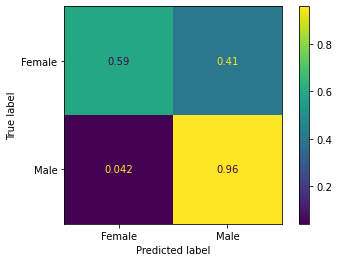

In [15]:
plot_confusion_matrix(model,X_scaled,train_y,normalize='true')

In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_scaled, train_y, cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.03


In [17]:
#Tune LDA Hyperparameters
model = LinearDiscriminantAnalysis()
# define grid
grid = dict()
grid['solver'] = [ 'svd','lsqr','eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=10)
# perform the search
results = search.fit(X_scaled, train_y)
# summarize
print('Mean Accuracy: %.2f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.87
Config: {'solver': 'svd'}


/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 599, in fit
    self._solve_eigen(
  File "/Users/vijayaadhithan/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 440, in _so

In [18]:
#naive classifier
print('Accuracy:')
print(f"{np.mean(train_y == 'Male'):.2f}")

Accuracy:
0.76


In [19]:
print(type(pred))

<class 'numpy.ndarray'>


1    246
0    141
Name: 0, dtype: int64


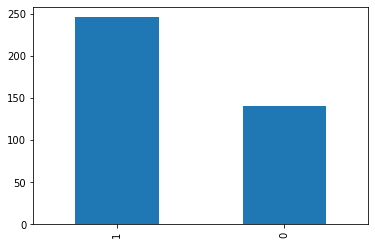

In [20]:
df2 = pd.DataFrame(pred)
df2.replace(["Male","Female"],[1,0],inplace=True)
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df2[0].map(lambda x: color_wheel.get(x + 1))
print(df2[0].value_counts())
p=df2[0].value_counts().plot(kind="bar")